In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from load_mnist import load_mnist
from utils import train_neural_network

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [3]:
# Load MNIST dataset
X_train, Y_train, X_test, Y_test = load_mnist()

In [4]:
# Hyperparameters
num_epochs = 50
learning_rate = 0.01
batch_size = 100

# Convert data to PyTorch tensors
X_train_tensor_3D = torch.tensor(X_train, dtype=torch.float32).to(device).view(-1, 1, 28, 28)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
X_test_tensor_3D = torch.tensor(X_test, dtype=torch.float32).to(device).view(-1, 1, 28, 28)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor_3D, Y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor_3D, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Epoch 1/50, Train Loss: 0.4531, Test Loss: 0.0973, Train Accuracy: 85.71%, Test Accuracy: 97.14%
Epoch 2/50, Train Loss: 0.0931, Test Loss: 0.0652, Train Accuracy: 97.13%, Test Accuracy: 97.90%
Epoch 3/50, Train Loss: 0.0661, Test Loss: 0.0546, Train Accuracy: 97.95%, Test Accuracy: 98.19%
Epoch 4/50, Train Loss: 0.0534, Test Loss: 0.0557, Train Accuracy: 98.36%, Test Accuracy: 98.20%
Epoch 5/50, Train Loss: 0.0450, Test Loss: 0.0392, Train Accuracy: 98.58%, Test Accuracy: 98.56%
Epoch 6/50, Train Loss: 0.0398, Test Loss: 0.0411, Train Accuracy: 98.77%, Test Accuracy: 98.59%
Epoch 7/50, Train Loss: 0.0365, Test Loss: 0.0391, Train Accuracy: 98.83%, Test Accuracy: 98.66%
Epoch 8/50, Train Loss: 0.0314, Test Loss: 0.0384, Train Accuracy: 99.04%, Test Accuracy: 98.76%
Epoch 9/50, Train Loss: 0.0293, Test Loss: 0.0430, Train Accuracy: 99.12%, Test Accuracy: 98.56%
Epoch 10/50, Train Loss: 0.0272, Test Loss: 0.0357, Train Accuracy: 99.16%, Test Accuracy: 98.90%
Epoch 11/50, Train Loss: 0.02

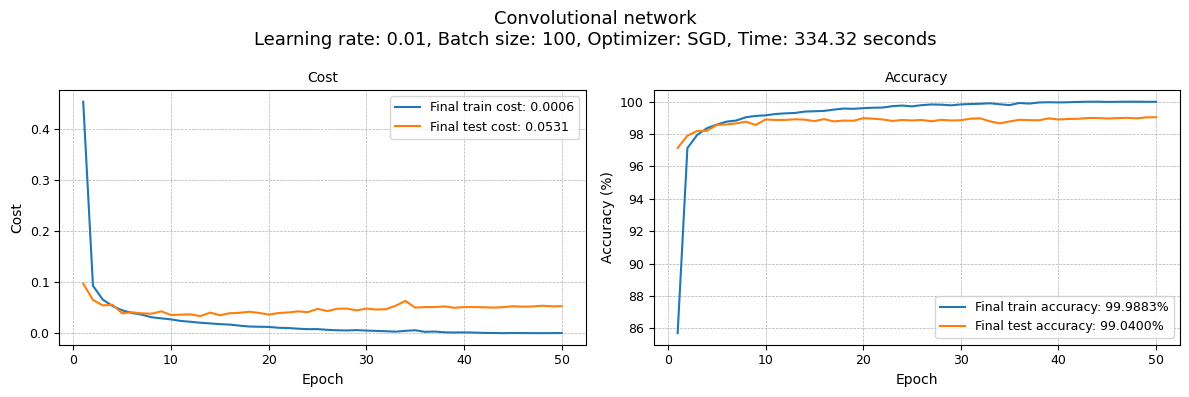

Runtime of train_neural_network: 334.9511 seconds


In [5]:
class ConvNetA(nn.Module):
    def __init__(self):
        super(ConvNetA, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


# Hyperparameters
num_epochs = 50
learning_rate = 0.01

conv_model_A = ConvNetA().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_model_A.parameters(), lr=learning_rate, momentum=0.9)
train_neural_network(conv_model_A, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network A")


Epoch 1/50, Train Loss: 2.3025, Test Loss: 2.3024, Train Accuracy: 11.01%, Test Accuracy: 11.35%
Epoch 2/50, Train Loss: 2.3024, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 3/50, Train Loss: 2.3023, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 4/50, Train Loss: 2.3024, Test Loss: 2.3023, Train Accuracy: 11.23%, Test Accuracy: 11.35%
Epoch 5/50, Train Loss: 2.3023, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 6/50, Train Loss: 2.3023, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 7/50, Train Loss: 2.3024, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 8/50, Train Loss: 2.3024, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 9/50, Train Loss: 2.3023, Test Loss: 2.3024, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 10/50, Train Loss: 2.3024, Test Loss: 2.3023, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch 11/50, Train Loss: 2.30

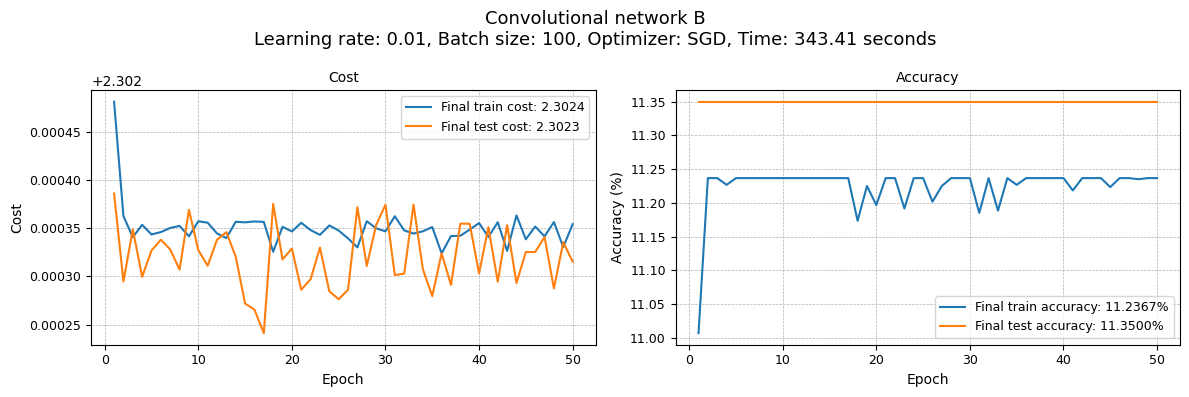

Runtime of train_neural_network: 343.9567 seconds


In [15]:
class ConvNetB(nn.Module):
    def __init__(self):
        super(ConvNetB, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


# Hyperparameters
num_epochs = 50
learning_rate = 0.01

conv_model_B = ConvNetB().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_model_B.parameters(), lr=learning_rate, weight_decay=1)
train_neural_network(conv_model_B, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network B")


Epoch 1/50, Train Loss: 0.4041, Test Loss: 0.1049, Train Accuracy: 87.39%, Test Accuracy: 96.52%
Epoch 2/50, Train Loss: 0.0980, Test Loss: 0.0710, Train Accuracy: 97.04%, Test Accuracy: 97.60%
Epoch 3/50, Train Loss: 0.0724, Test Loss: 0.0623, Train Accuracy: 97.78%, Test Accuracy: 97.89%
Epoch 4/50, Train Loss: 0.0600, Test Loss: 0.0568, Train Accuracy: 98.15%, Test Accuracy: 98.17%
Epoch 5/50, Train Loss: 0.0515, Test Loss: 0.0452, Train Accuracy: 98.42%, Test Accuracy: 98.59%
Epoch 6/50, Train Loss: 0.0466, Test Loss: 0.0467, Train Accuracy: 98.52%, Test Accuracy: 98.53%
Epoch 7/50, Train Loss: 0.0425, Test Loss: 0.0437, Train Accuracy: 98.71%, Test Accuracy: 98.59%
Epoch 8/50, Train Loss: 0.0401, Test Loss: 0.0411, Train Accuracy: 98.73%, Test Accuracy: 98.72%
Epoch 9/50, Train Loss: 0.0370, Test Loss: 0.0365, Train Accuracy: 98.86%, Test Accuracy: 98.87%
Epoch 10/50, Train Loss: 0.0347, Test Loss: 0.0391, Train Accuracy: 98.91%, Test Accuracy: 98.66%
Epoch 11/50, Train Loss: 0.03

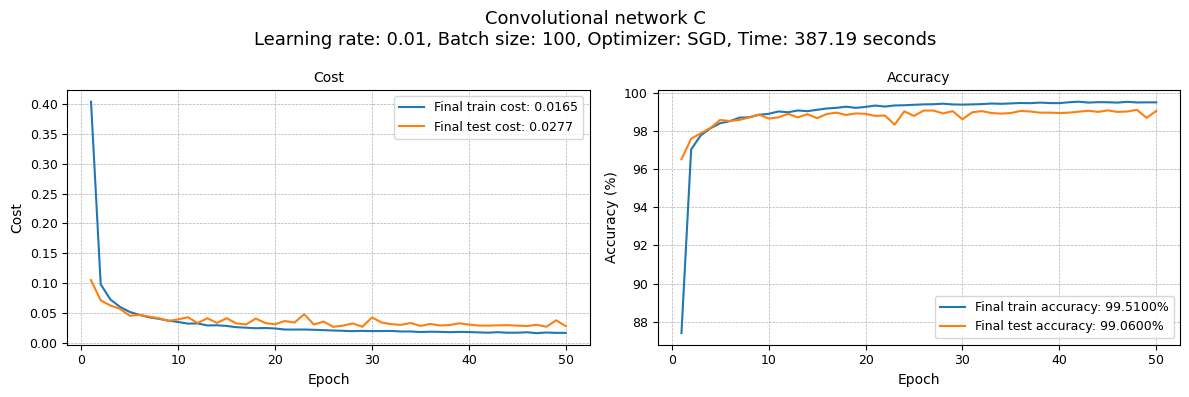

Runtime of train_neural_network: 388.1906 seconds


In [14]:
class ConvNetC(nn.Module):
    def __init__(self):
        super(ConvNetC, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)
        
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out




conv_model_C = ConvNetC().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_model_C.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.001)
train_neural_network(conv_model_C, criterion, optimizer, train_loader, test_loader, num_epochs, device, "Convolutional network C")


In [42]:
from utils import compute_confusion_matrix
import numpy as np
confusion_matrix = torch.zeros(10, 10).to(device)
with torch.no_grad():
  for (x_test, y_test) in test_loader:
    x_test, y_test = x_test.to(device), y_test.to(device)
    predictions = conv_model_C(x_test) # Forward pass on test dataset
    confusion_matrix += compute_confusion_matrix(predictions, y_test)
for row in range(10):
  for col in range(10):
    print(f'{int(confusion_matrix[row,col]):6d}', end = " ")
  print('\n')    
  


   977      0      0      0      0      1      3      1      3      1 

     0   1130      1      0      1      0      2      3      0      3 

     0      2   1028      2      0      0      1      5      1      0 

     0      0      0    999      0      3      0      0      1      2 

     0      1      0      0    972      0      1      0      0      5 

     1      0      0      4      0    884      3      0      1      5 

     0      1      0      0      1      1    946      0      0      0 

     1      0      2      0      1      0      0   1016      0      3 

     1      1      1      5      1      1      2      1    965      1 

     0      0      0      0      6      2      0      2      3    989 



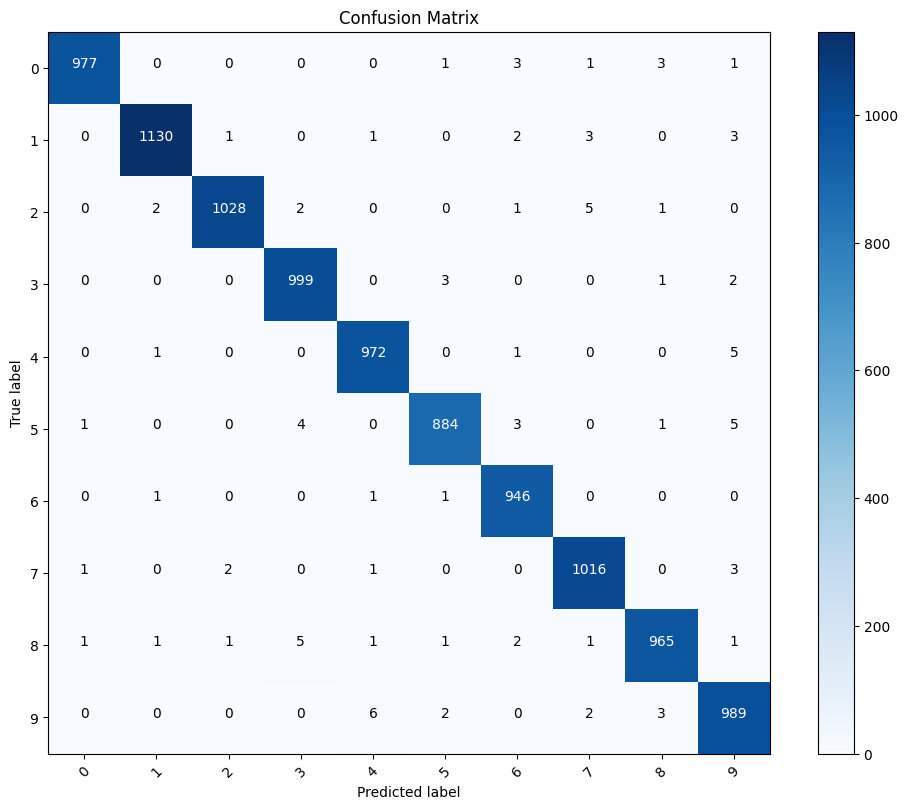

In [145]:
import matplotlib.pyplot as plt
import itertools
# Define class labels
class_labels = np.arange(10)

confusion_matrix_np = confusion_matrix.cpu().numpy()
# Create confusion matrix plot
plt.figure(figsize=(10, 8))
plt.imshow(confusion_matrix_np, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add labels to each cell
thresh = confusion_matrix_np.max() / 2.
for i, j in itertools.product(range(confusion_matrix_np.shape[0]), range(confusion_matrix_np.shape[1])):
    plt.text(j, i, format(confusion_matrix_np[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if confusion_matrix_np[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [113]:
import numpy as np
conv_model_C.eval()

with torch.no_grad():
    # Forward pass to get the predictions
    outputs = conv_model_C(X_test_tensor_3D)
    _, predicted = torch.max(outputs.data, 1)
labels = np.argmax(Y_test, axis=1)
predicted = predicted.to('cpu').numpy() 
wrong_indices = np.where(predicted != labels)[0]
wrong_indices

array([ 508,  629,  634, 1054, 1218, 1239, 1328, 1754, 2190, 2550, 2958,
       3113, 3147, 3186, 3266, 3435, 3450, 3455, 3456, 3574, 3621, 3740,
       3741, 4173, 4280, 4295, 4388, 4426, 4532, 4643, 4911, 5105, 5118,
       5205, 5323, 5376, 5462, 5678, 5683, 5686, 6010, 6066, 6118, 6206,
       6221, 6223, 6267, 6352, 6360, 6387, 6453, 6480, 6956, 7091, 7115,
       7118, 7143, 7351, 7385, 7387, 7588, 7654, 7903, 7904, 7958, 8066,
       8102, 8138, 8196, 8294, 8331, 8484, 8659, 8840, 9106, 9107, 9121,
       9140, 9158, 9177, 9193, 9197, 9210, 9219, 9220, 9278, 9325, 9334,
       9379, 9389, 9409, 9491, 9620, 9665], dtype=int64)

In [135]:
selected_wrong_indices = {i: None for i in range(10)}

for index in wrong_indices:
    if selected_wrong_indices[labels[index]] is None:
        selected_wrong_indices[labels[index]] = (X_test_tensor_3D[index].cpu().squeeze(), predicted[index], labels[index])

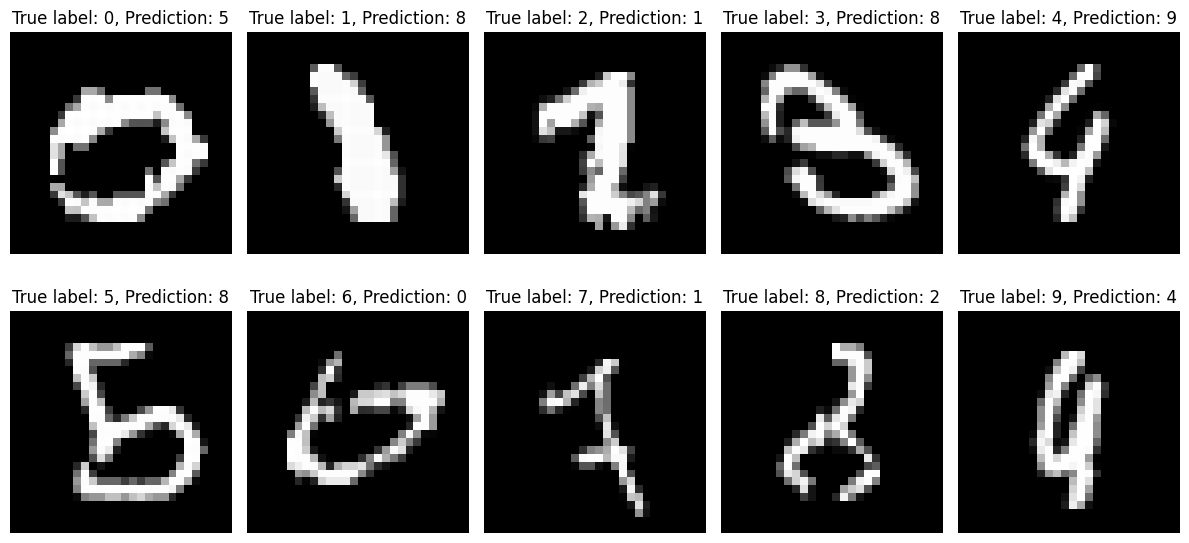

In [134]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, (image, prediction, label) in selected_wrong_indices.items():
    axs[i//5, i%5].imshow(image, cmap='gray')
    axs[i//5, i%5].set_title(f'True label: {label}, Prediction: {prediction}')
    axs[i//5, i%5].axis('off')
plt.tight_layout()